## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston, load_wine
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report

### Bsoton Data

In [5]:
boston = load_boston()
X, y = boston.data, boston.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

grid_para = {'n_estimators': np.arange(10, 20), 'max_depth': np.arange(10, 20)}

randfroest_reg = RandomForestRegressor()
grid_randforest_reg = GridSearchCV(randfroest_reg, grid_para, cv=5)
grid_randforest_reg.fit(x_train, y_train)

print('best parameters: {}'.format(grid_randforest_reg.best_params_))
y_pred = grid_randforest_reg.predict(x_test)
r_square = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-square: {}, MSE: {}'.format(r_square, mse))

best parameters: {'max_depth': 15, 'n_estimators': 16}
R-square: 0.8855382435739573, MSE: 7.760161282768518


/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


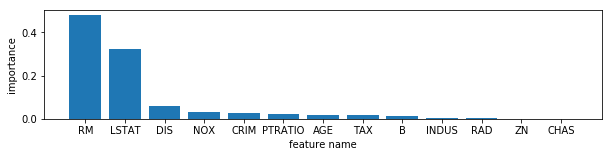

In [6]:
feature_importance_dict = {'feature': boston.feature_names,
                           'importance': grid_randforest_reg.best_estimator_.feature_importances_}

feature_importance_df = pd.DataFrame(feature_importance_dict).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 2))
plt.bar(x=feature_importance_df['feature'], height=feature_importance_df['importance'], align='center')
plt.xlabel('feature name')
plt.ylabel('importance')
plt.show()

### Wine Data

In [7]:
wine = load_wine()

X, y = wine.data, wine.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

grid_param = {'n_estimators': np.arange(12, 20), 'max_depth': np.arange(2, 10)}

randforest_cls = RandomForestClassifier()
grid_randforest_cls = GridSearchCV(randforest_cls, grid_param, cv=5)
grid_randforest_cls.fit(x_train, y_train)
print('Best Parameters: {}'.format(grid_randforest_cls.best_params_))

print('-' * 50)
y_pred = grid_randforest_cls.predict(x_test)
report = classification_report(y_test, y_pred,
                               labels=np.unique(wine.target),
                               target_names=wine.target_names)
print(report)

Best Parameters: {'max_depth': 4, 'n_estimators': 17}
--------------------------------------------------
              precision    recall  f1-score   support

     class_0       1.00      0.83      0.91        18
     class_1       0.89      1.00      0.94        25
     class_2       1.00      1.00      1.00        11

   micro avg       0.94      0.94      0.94        54
   macro avg       0.96      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


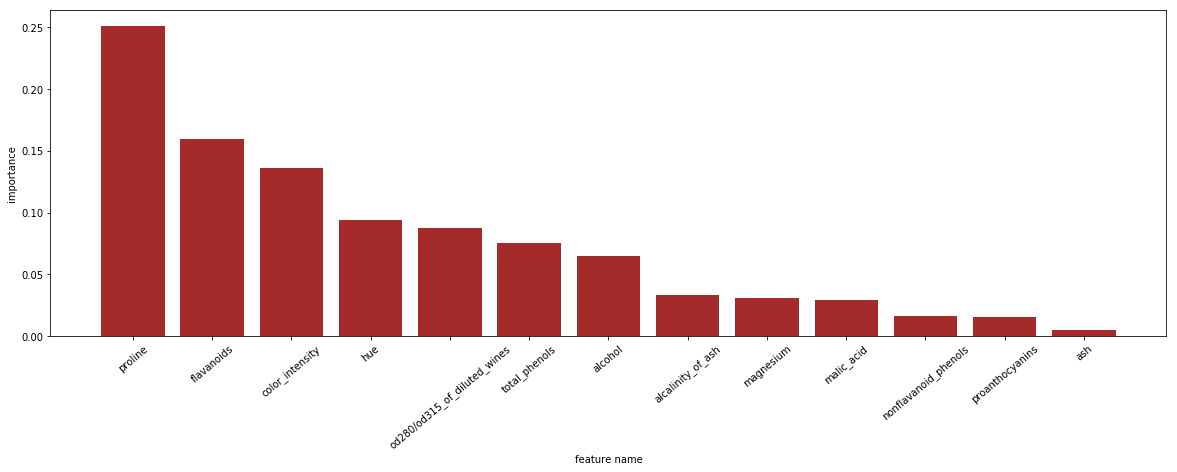

In [8]:
feature_importance_dict = {'feature': wine.feature_names,
                           'importance': grid_randforest_cls.best_estimator_.feature_importances_}

feature_importance_df = pd.DataFrame(feature_importance_dict).sort_values(by='importance', ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(x=feature_importance_df['feature'], height=feature_importance_df['importance'],
        align='center', color='brown')
plt.xlabel('feature name')
plt.xticks(rotation=40)
plt.ylabel('importance')
plt.show()